## Visualização e exploração dos dados do Covid-19 em Portugal

#### Dados extraídos de : 
- https://github.com/dssg-pt/covid19pt-data 
- https://www.dgs.pt/
- https://github.com/CSSEGISandData/COVID-19

## Obrigado pela vossa compilação, assim podemos acompanhar a evolução


In [1]:
#importacao de bibliotecas
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pathlib import Path
import pandas as pd
from statsmodels.api import OLS
from statsmodels.tools.tools import add_constant
import numpy as np

In [2]:
PATH_DATA = "../"

In [3]:
#chamar o ficheiro do tipo csv
df_data = pd.read_csv(f"{PATH_DATA}data.csv")

In [4]:
df_data.tail()

,data,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
35,01-04-2020,01-04-2020 00:00,8251,4910,1043,1998,54,146,52,48,...,1.0,6.0,1.0,16.0,14.0,27.0,58.0,62.0,76.0,111.0
36,02-04-2020,02-04-2020 00:00,9034,5338,1161,2207,59,164,57,48,...,2.0,6.0,2.0,16.0,15.0,30.0,63.0,73.0,84.0,125.0
37,03-04-2020,03-04-2020 00:00,9886,5899,1286,2347,62,179,63,50,...,2.0,7.0,3.0,18.0,23.0,35.0,73.0,83.0,103.0,143.0
38,04-04-2020,04-04-2020 00:00,10524,6280,1372,2513,63,182,63,51,...,2.0,6.0,4.0,20.0,22.0,38.0,86.0,84.0,117.0,149.0
39,05-04-2020,05-04-2020 00:00,11278,6530,1442,2904,82,201,67,52,...,2.0,6.0,6.0,21.0,24.0,42.0,92.0,98.0,127.0,168.0


In [5]:
# Informação sobre os campos do ficheiro csv
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 84 columns):
data                                 40 non-null object
data_dados                           40 non-null object
confirmados                          40 non-null int64
confirmados_arsnorte                 40 non-null int64
confirmados_arscentro                40 non-null int64
confirmados_arslvt                   40 non-null int64
confirmados_arsalentejo              40 non-null int64
confirmados_arsalgarve               40 non-null int64
confirmados_acores                   40 non-null int64
confirmados_madeira                  40 non-null int64
confirmados_estrangeiro              16 non-null float64
confirmados_novos                    40 non-null int64
recuperados                          40 non-null int64
obitos                               40 non-null int64
internados                           32 non-null float64
internados_uci                       23 non-null float64
lab      

In [6]:
#estatistica descritiva dos dados
df_data.describe()

,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,confirmados_novos,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
count,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,16.00000,40.000000,...,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,2402.975000,1378.825000,297.800000,634.600000,14.425000,47.025000,14.025000,12.525000,9.12500,281.950000,...,1.307692,4.615385,1.615385,13.615385,10.384615,22.846154,44.307692,48.307692,59.230769,89.538462
std,3469.271493,2058.068436,443.881897,848.198296,23.492375,62.137353,21.630329,19.097573,5.86373,333.712294,...,0.480384,1.556624,1.757767,5.188745,8.770580,11.495261,28.102149,29.457270,39.669791,47.494939
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,...,1.000000,2.000000,0.000000,4.000000,0.000000,5.000000,9.000000,12.000000,10.000000,23.000000
25%,19.000000,13.250000,1.000000,4.750000,0.000000,0.000000,0.000000,0.000000,5.00000,3.750000,...,1.000000,3.000000,1.000000,9.000000,4.000000,14.000000,20.000000,23.000000,27.000000,49.000000
50%,389.500000,167.000000,41.000000,161.000000,0.000000,13.500000,1.000000,0.000000,9.00000,101.500000,...,1.000000,5.000000,1.000000,15.000000,8.000000,23.000000,40.000000,45.000000,52.000000,88.000000
75%,3725.000000,2004.250000,456.250000,1089.000000,22.500000,91.500000,24.000000,17.250000,11.00000,570.000000,...,2.000000,6.000000,2.000000,16.000000,15.000000,30.000000,63.000000,73.000000,84.000000,125.000000
max,11278.000000,6530.000000,1442.000000,2904.000000,82.000000,201.000000,67.000000,52.000000,21.00000,1035.000000,...,2.000000,7.000000,6.000000,21.000000,24.000000,42.000000,92.000000,98.000000,127.000000,168.000000


In [7]:
data1 = pd.read_csv(f"{PATH_DATA}data.csv", parse_dates=[0], index_col=[0], infer_datetime_format=True)
data1.fillna(value=0).head(5)

,data_dados,confirmados,confirmados_arsnorte,confirmados_arscentro,confirmados_arslvt,confirmados_arsalentejo,confirmados_arsalgarve,confirmados_acores,confirmados_madeira,confirmados_estrangeiro,...,obitos_50_59_f,obitos_50_59_m,obitos_60_69_f,obitos_60_69_m,obitos_70_79_f,obitos_70_79_m,obitos_80_plus_f,obitos_80_plus_m,obitos_f,obitos_m
data,,,,,,,,,,,,,,,,,,,,,
2020-02-26,26-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-27,27-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-28,28-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,29-02-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-03-01,01-03-2020 00:00,0,0,0,0,0,0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


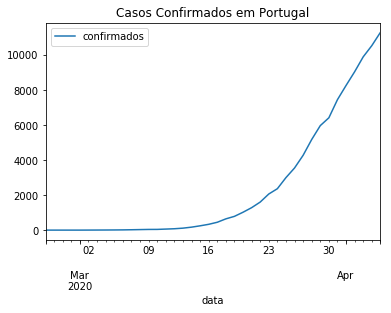

In [8]:
#Evolução do número de casos
data1[['confirmados']].plot(kind='line', title='Casos Confirmados em Portugal')

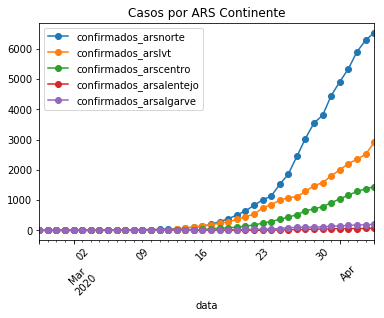

In [9]:
#Evolução do número de casos por ARS
data1[['confirmados_arsnorte', 'confirmados_arslvt', 'confirmados_arscentro', 'confirmados_arsalentejo', 'confirmados_arsalgarve',]].plot(kind='line', title='Casos por ARS Continente', linestyle='-', marker='o', rot=45, fontsize=10)

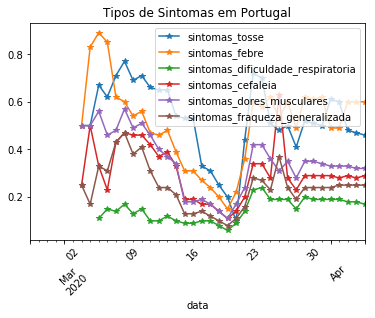

In [10]:
#Tipos de sintomas
data1[['sintomas_tosse' , 'sintomas_febre' , 'sintomas_dificuldade_respiratoria', 'sintomas_cefaleia' , 'sintomas_dores_musculares' , 'sintomas_fraqueza_generalizada']].plot(kind='line', title='Tipos de Sintomas em Portugal', linestyle='-', marker='*', rot=45, fontsize=10)

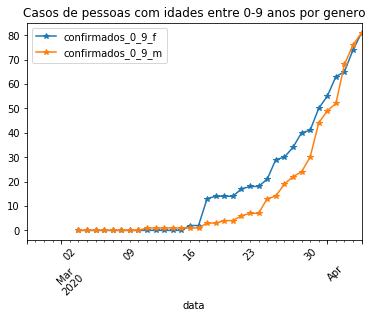

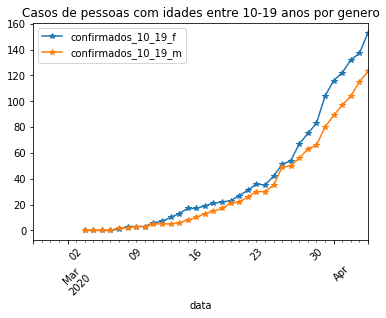

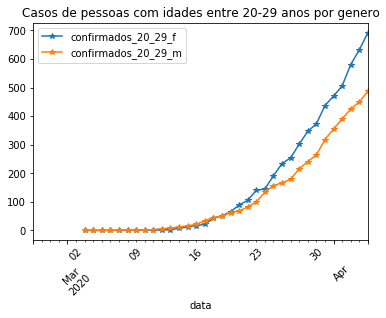

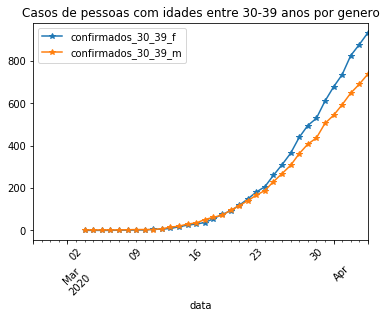

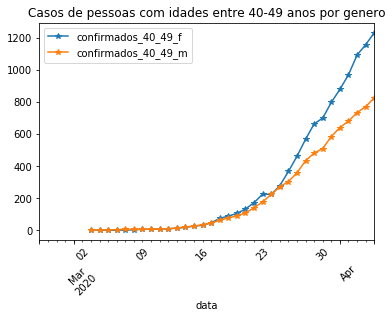

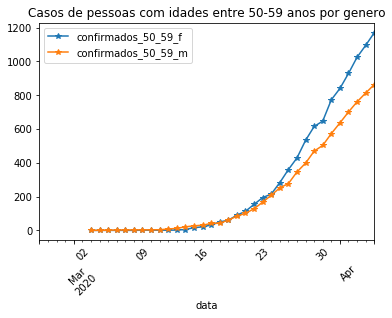

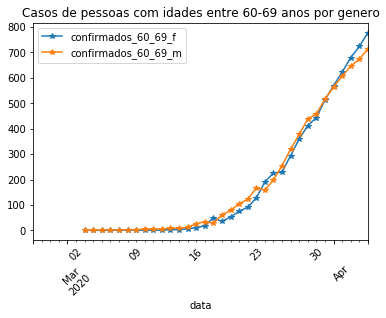

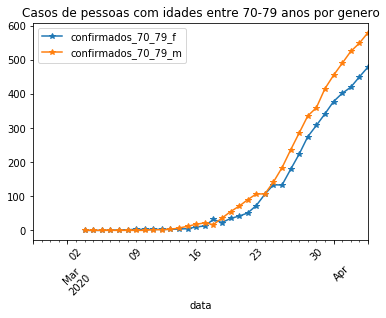

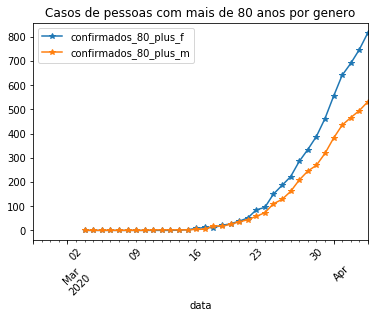

In [11]:
data1[['confirmados_0_9_f' , 'confirmados_0_9_m']].plot(kind='line', title='Casos de pessoas com idades entre 0-9 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_10_19_f' , 'confirmados_10_19_m']].plot(kind='line', title='Casos de pessoas com idades entre 10-19 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_20_29_f' , 'confirmados_20_29_m']].plot(kind='line', title='Casos de pessoas com idades entre 20-29 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_30_39_f' , 'confirmados_30_39_m']].plot(kind='line', title='Casos de pessoas com idades entre 30-39 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_40_49_f' , 'confirmados_40_49_m']].plot(kind='line', title='Casos de pessoas com idades entre 40-49 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_50_59_f' , 'confirmados_50_59_m']].plot(kind='line', title='Casos de pessoas com idades entre 50-59 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_60_69_f' , 'confirmados_60_69_m']].plot(kind='line', title='Casos de pessoas com idades entre 60-69 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_70_79_f' , 'confirmados_70_79_m']].plot(kind='line', title='Casos de pessoas com idades entre 70-79 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)
data1[['confirmados_80_plus_f' , 'confirmados_80_plus_m']].plot(kind='line', title='Casos de pessoas com mais de 80 anos por genero', linestyle='-', marker='*', rot=45, fontsize=10)


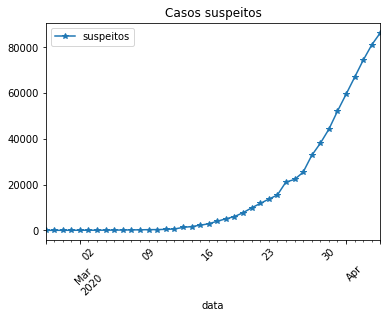

In [12]:
#Evolução dos suspeitos
data1[['suspeitos' ]].plot(kind='line', title='Casos suspeitos', linestyle='-', marker='*', rot=45, fontsize=10)

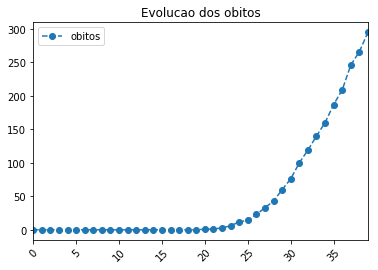

In [13]:
#obitos

df_data[['obitos']].plot(kind='line', title='Evolucao dos obitos', linestyle='--', marker='o', rot=45, fontsize=10)

## Ordinary Least Squares (OLS) -> Estimacao de parametros desconhecidos da regressão linear

In [14]:
confir = np.array([2, 4, 6, 9, 13, 21, 30, 39, 41, 59, 78, 112, 169, 245, 331, 448, 642, 785, 1020, 1280, 1600, 2060, 2362, 2995, 3544, 4268, 5170, 5962, 6408, 7443, 8251, 9034, 9886, 10524, 11278])

In [15]:
print (confir)

[    2     4     6     9    13    21    30    39    41    59    78   112
   169   245   331   448   642   785  1020  1280  1600  2060  2362  2995
  3544  4268  5170  5962  6408  7443  8251  9034  9886 10524 11278]


In [16]:
x = np.arange(len(confir))
x = add_constant(x)

In [17]:
modelo = OLS(np.log(confir[:34]), x[:34])

In [18]:
resultado = modelo.fit()

In [19]:
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 05 Apr 2020   Prob (F-statistic):           1.07e-25
Time:                        17:39:44   Log-Likelihood:                -21.205
No. Observations:                  34   AIC:                             46.41
Df Residuals:                      32   BIC:                             49.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7649      0.156     11.302      0.000       1.447       2.083
x1             0.2570      0.008     31.593      0.000       0.240       0.274
==============================================================================
Omnibus:                        3.449   Durbin-Watson:                   0.092
Prob(Omnibus):                  0.178   Jarque-Bera (JB):                3.129
Skew:                          -0.717   Prob(JB):                        0.209
Kurtosis:                       2.611   Cond. No.                         37.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

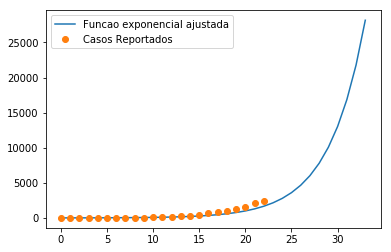

In [20]:
plt.plot(
    np.exp(resultado.predict(x[:34])),
    label="Funcao exponencial ajustada"      
)
plt.plot(confir[:23], "o", label="Casos Reportados")
plt.legend()
plt.show()